In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
path_to_data = "../DATA/Raw/"
clin_df = pd.read_csv(os.path.join(path_to_data, "dataset_495_long.csv"))

## Exploring the # of participants (by number of years of visits required)

In [10]:
unique_projids = clin_df["projid"].unique()
print("# of unique patients: ", len(unique_projids))

# of unique patients:  3194


# patients with at least X visits: 
1 visits: 3194 patients
3 visits: 2636 patients
5 visits: 2086 patients
10 visits: 1061 patients


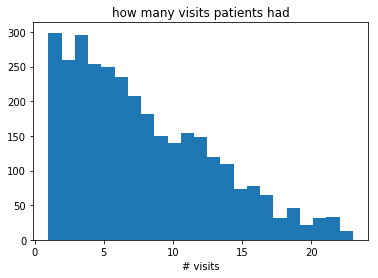

In [11]:
num_visits_list = np.array([len(clin_df[clin_df["projid"] == pid]) for pid in unique_projids])
plt.hist(num_visits_list,bins=23)
plt.title("how many visits patients had");
plt.xlabel("# visits")


print("# patients with at least X visits: ")
for x in [1,3,5,10]:
    print("%i visits: %i patients"%(x, np.sum(num_visits_list>=x)))

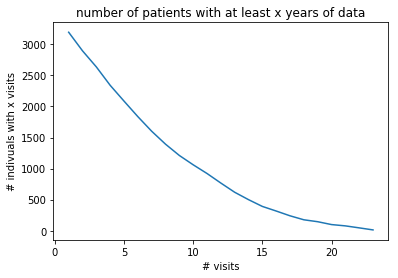

In [13]:
num_subs_min_years = [np.sum(num_visits_list>=x) for x in range(1, max(num_visits_list)+1)]
plt.plot(np.arange(1, max(num_visits_list)+1), num_subs_min_years)
plt.title("number of patients with at least x years of data")
plt.xlabel("# visits")
plt.ylabel("# indivuals with x visits");

## Exploring the frequency of different cognitive trajectories among participants

In [32]:
projids_min2y = unique_projids[np.where(num_visits_list>=2)[0]]
var_of_interest = "dcfdx"

first_dxs = []
last_dxs = []
pids_kept = []
for pid in projids_min2y:
    cur_pid = clin_df[clin_df["projid"] == pid]
    first,last = cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].min()][var_of_interest].values[0], cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].max()][var_of_interest].values[0]
    if ~np.isnan(first) and ~np.isnan(last):
        first_dxs.append(first)
        last_dxs.append(last)
        pids_kept.append(pid)

In [33]:
first_dxs = np.array(first_dxs).flatten()
last_dxs = np.array(last_dxs).flatten()
print("# of participants with 6 years of data and known 1st and last status:", len(first_dxs))

# of participants with 6 years of data and known 1st and last status: 2619


In [34]:
dcfdx_dementia_mapping = {1: "Normal", 2: "MCI", 3: "MCI", 4: "Dementia", 5:"Dementia", 6:"Dementia"}
dementia_to_number_mapping = {"Normal":2, "MCI":1, "Dementia":0}

In [35]:
trajectories = [str(dcfdx_dementia_mapping[f])+"-"+str(dcfdx_dementia_mapping[l]) for f,l in zip(first_dxs,last_dxs)]

In [36]:
traj, counts = np.unique(trajectories, return_counts=True)

In [39]:
order = ["Normal", "MCI", "Dementia"]
count_table = np.zeros([len(order), len(order)])
for idx, trajname in enumerate(traj):
    c = counts[idx]
    start,end = trajname.split("-")
    count_table[order.index(start),order.index(end)] = c

In [73]:
print("Frequencies of trajectories:")
pd.DataFrame(count_table, columns=order, index=order)

Frequencies of trajectories:


,Normal,MCI,Dementia
Normal,1146.0,341.0,343.0
MCI,153.0,222.0,276.0
Dementia,3.0,6.0,129.0


In [74]:
print("Percentages of trajectories:")
pd.DataFrame(np.round(count_table / np.sum(count_table) , 3)*100 , columns=order, index=order)


Percentages of trajectories:


,Normal,MCI,Dementia
Normal,43.8,13.0,13.1
MCI,5.8,8.5,10.5
Dementia,0.1,0.2,4.9


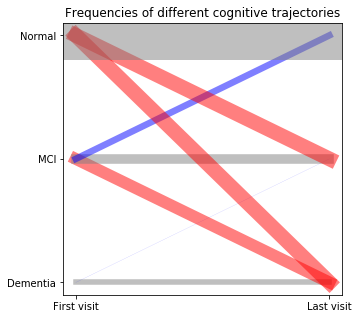

In [71]:
normed_counts_width = (counts - counts.min())/(counts.max()-counts.min())
max_width = 50

plt.figure(figsize=(5,5))
for i in range(len(traj)):
    c = normed_counts_width[i] * max_width 
    traj_numeric = [dementia_to_number_mapping[x] for x in traj[i].split("-")]
    
    if traj_numeric[1]-traj_numeric[0]>0:
        color = "blue"
    elif traj_numeric[1]-traj_numeric[0]<0:
        color = "red"
    else:
        color = "grey"
        
    plt.plot([0,1],traj_numeric, linewidth=c, alpha=.5, color=color)
plt.xticks(np.arange(2), ("First visit", "Last visit"))
plt.yticks(np.arange(3), ("Dementia", "MCI", "Normal"))
plt.title("Frequencies of different cognitive trajectories");

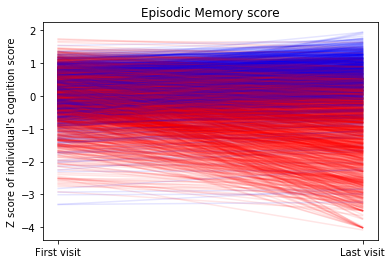

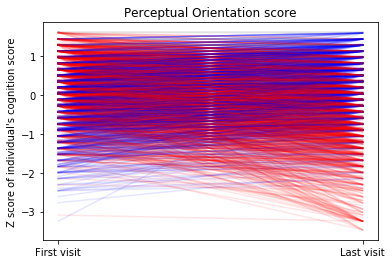

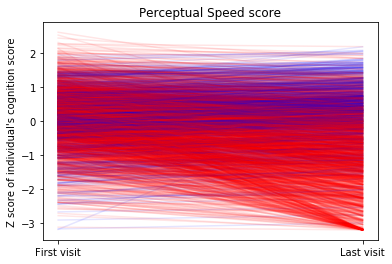

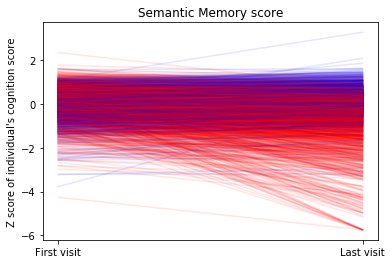

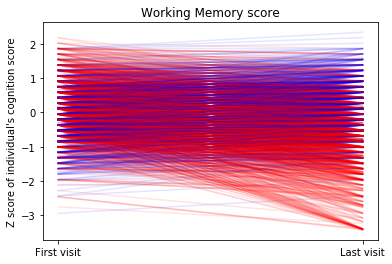

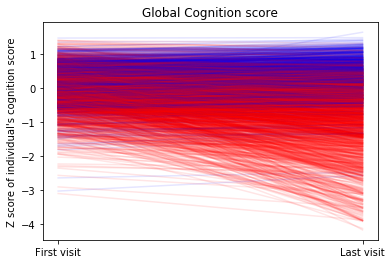

In [64]:
cogn_var_mapper = {'cogn_ep': "Episodic Memory", 'cogn_po': "Perceptual Orientation", 'cogn_ps': "Perceptual Speed", 'cogn_se': "Semantic Memory", 'cogn_wo': "Working Memory", 'cogn_global': "Global Cognition"}

for var_of_interest in ['cogn_ep', 'cogn_po', 'cogn_ps', 'cogn_se', 'cogn_wo', 'cogn_global']:

    first_dxs = []
    last_dxs = []
    pids_kept = []
    for pid in projids_min2y:
        cur_pid = clin_df[clin_df["projid"] == pid]
        first,last = cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].min()][var_of_interest].values[0], cur_pid[cur_pid["fu_year"]==cur_pid["fu_year"].max()][var_of_interest].values[0]
        if ~np.isnan(first) and ~np.isnan(last):
            first_dxs.append(first)
            last_dxs.append(last)
            pids_kept.append(pid)

    plt.figure()
    for row in np.vstack([first_dxs, last_dxs]).T:
        if row[1]-row[0]>0:
            color = "blue"
        elif row[1]-row[0]<0:
            color = "red"
        else:
            color = "grey"
        plt.plot([0,1],row,alpha=.1,color=color)
    
    plt.xticks(np.arange(2), ("First visit", "Last visit"))
    plt.ylabel("Z score of individual's cognition score")
    plt.title("%s score"%cogn_var_mapper[var_of_interest]);